# 1. Linear Regression

### 가상의 데이터로 예측하기

In [1]:
from sklearn.datasets import make_regression

-  Scikit-Learn의 datasets 서브패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 제공한다. make_regression()으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.

In [2]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [3]:
print('input data :\n{}, \n\n output data :\n{}'.format(data[0][-10:], data[1][-10:]))

input data :
[[-1.61218357]
 [ 0.77928464]
 [ 0.39901148]
 [ 0.4187733 ]
 [ 1.36425217]
 [-0.04683154]
 [-1.2325311 ]
 [-0.39452597]
 [ 0.37652735]
 [-2.05593838]], 

 output data :
[ 804.08527406 1185.17508734 1030.96036085 1056.5394312  1095.73969543
  947.38872435  806.98683202  917.65471498 1059.52765227  798.56026674]


- n_samples : 기본값은 100, 표본 데이터의 갯수, 정수  
- n_features : 기본값은 100, 독립변수의 수(차원), 정수  
- n_target : 기본값은 1, 종속변수의 수, 정수  
- bias = 기본값은 0.0, y절편, 실수   
- nosie = 기본값은 0.0, 분포 

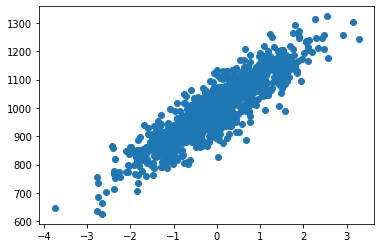

In [13]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.show()

#### 선형 모델을 만들어 보자.

In [4]:
from sklearn.model_selection import train_test_split
# train_test_split은 데이터를 학습용 데이터와 검증용 데이터로 분리시켜줍니다.

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2, shuffle = True)

# 생성한 가상의 데이터를 훈련용 데이터와 검증 데이터로 나눠주는 과정입니다.

- train_test_split(data, data2, test_size, train_size, shuffle, random_state)  
  data: 독립변수 데이터  
  data2: 종속변수 데이터 (data 인수에 종속변수가 포함되어 있다면 생략해도 된다.)  
  test_size: 검증용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다. (기본값은 0.25)  
  train_size : 학습용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다.(test_size와 train_size 중 하나만 사용해도 된다.)  
  shuffle: 데이터를 섞어준다. (기본값은 True)  
  random_state: 난수를 생성해준다.

In [5]:
# 선형회귀(Linear Regression)

from sklearn.linear_model import LinearRegression
# LinearRegression을 import 합니다.

hypothesis = LinearRegression()
# import한 LinearRegression을 model이라는 변수에 대입한다.
# 굳이 별도의 변수에 넣어주지 않고 LinearRegression() 으로 사용해도 무방합니다. 여기서는 설명을 위해 변수에 대입하였습니다.

# model에는 W1 * X1 + W0 (선형회귀의 기본 Hypothesis)가 생략되어 있습니다.

#### 생성한 모델을 학습시켜보자.

In [6]:
model_linear = hypothesis.fit(X_train, y_train)
# fit()은 모델을 학습시키는 명령입니다.

# cost = avg((model - y)**2) 생략된 코드입니다. (예측값에서 결과값을 뺀 평균 즉, cost를 구하는 것)
# for i in range(10000):
#     gradDecent(cost)  구한 cost값을 이용해서 gradient Descent 실행
# 생략된 과정들이 fit()안에 들어 있습니다.

#### 생성한 모델의 weight(가중치, 계수)와 bias를 출력해보자.

In [7]:
model_linear.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열입니다.
# 우리가 생성한 데이터에는 입력 특성이 하나이므로 하나만 출력됩니다.
# coef_ 는 weight값을 보여줍니다.

array([99.27406534])

In [8]:
model_linear.intercept_
# intercept_ 속성은 항상 실수 값 하나입니다.
# intercept_ 는 bias(y 절편)값을 보여줍니다.

998.4266870070498

#### 우리가 생성한 모델을 검증 해보자.

- score()로 모델을 검증할 수 있다.

In [9]:
print("train data score : {:.2f}".format(model_linear.score(X_train, y_train)))
print("test data score : {:.2f}".format(model_linear.score(X_test, y_test)))

train data score : 0.79
test data score : 0.78


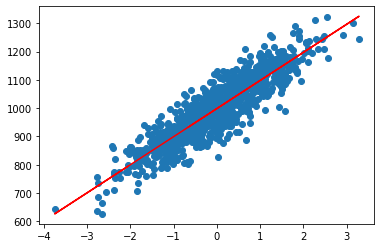

In [16]:
#Trainset data 와 함께, Hypothesis (직선) 시각화해보기
#Testset data 와 함께, Hypothesis (직선) 시각화해보기
plt.scatter(data[0], data[1])
plt.plot(data[0], model_linear.coef_*data[0] + model_linear.intercept_, c='red')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
# 회귀 평가 지표인 mean squared error, R2 score를 불러옵니다.

y_predict = model_linear.predict(X_test)
# predcit() 명령어를 사용하여 y값을 예측합니다.

In [18]:
mse = mean_squared_error(y_test, y_predict)
# 실제 값과 예측값을 이용하여 mean squared error를 측정합니다.

In [19]:
import numpy as np
rmse = np.sqrt(mse)
# root mean squared error를 측정할 수 있습니다.
# sqrt는 루트를 씌워주는 명령어입니다.

In [20]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 2573.526, RMSE : 50.730


In [21]:
print('test data score : {:.2f}'.format(r2_score(y_test, y_predict)))
# 실제값과 직접 만들어본 예측값을 이용하여 모델의 성능을 측정할 수 있습니다.

test data score : 0.78


- score(X_test, y_test)를 실행하게 되면 내부함수에서 X_test를 이용하여 예측값을 생성합니다. 그 후 생성된 예측값과 y_test(실제값)을 이용하여 성능을 검증해줍니다.  
- 모델의 성능만을 측정할때는 위의 번거러운 과정없이 score함수만을 활용하면 됩니다.

#### Linear Regression with Multi-Variable

앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러개의 특성을 가진 데이터 셋으로 션형회귀를 해보자.

In [48]:
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 50)

print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1], y_multi[:1]))

input data : 
[[ 0.87040297 -0.30639128 -0.69102904  0.2864559  -0.25749064 -0.8849452
  -1.03704299 -0.72698306  0.14350203 -1.00064917  1.35429249 -0.77479809
   0.23647933 -0.63227819 -0.07535929  0.31657663  0.99789105 -0.35527382
  -1.15769252 -0.67383181  0.66150943  0.49769944 -0.91042024  0.1273443
   1.40472978 -2.25279584  0.76611314  0.50159395  1.15792828 -1.43841286
   1.45201036  1.36632123  2.03652203 -1.11205639  1.20175242 -1.76014897
   1.22236488 -0.55598915 -0.64788717 -0.10041887 -1.44774822 -1.0794869
   0.47797687  0.47560315  0.57092839  0.55428188 -0.62439677 -1.00670299
   0.17307264 -1.12559038 -1.32334112  0.84051376  0.65838605  0.59194896
  -0.44669541  2.62649594  1.50424875  0.53599476  1.11922749 -0.62445369
   0.9558946  -1.14595647  0.66825809 -0.19220104 -2.92718074  1.13133839
  -0.09921828 -0.32245423  1.55871712 -0.94379009 -0.01238587 -1.73646206
   0.8075677  -0.29478668 -1.08883626 -0.50300384  1.86712246  0.66752183
   1.66842102 -0.07667212  

여기서는 input data를 살펴보도록 하자.  
1개의 input data에 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이다.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)
# 생성한 가상의 데이터를 학습용과 검증용으로 나눠줍니다.

In [50]:
hypothesis_multi = LinearRegression()
# hypothesis = W0 + W1 * X1 + W2 * X2 + ... + W10 * X10
# weight의 값은 10개 bias는 11개로 구성되어 있다.

In [51]:
model_linear_multi = hypothesis_multi.fit(X_train, y_train)
# 모델을 학습시킵니다.

In [52]:
print('weight : \n{}\n\n'.format(model_linear_multi.coef_))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
[ 3.08078570e-02 -2.25932096e+00  8.98506467e-01 -2.96394493e-01
 -3.85304615e-01  4.58176299e+00  1.11437570e+01 -2.06245065e+00
 -1.49861528e+00  2.34598793e+00 -3.99819284e+00  4.10848934e-01
 -3.48418108e+00  1.06907874e+00 -2.60138131e-01 -9.20313138e-01
 -1.05908279e+00  2.46655209e+00 -4.19472724e+00 -9.27382988e-01
  1.81337639e+00 -2.15447435e+00 -5.03178815e-01 -1.21354069e+00
  1.92948039e+00  1.74337111e+01  2.85805663e+00  4.73581549e+01
  2.17918313e+00 -1.87733174e+00  8.01232412e-01  3.21403865e+00
  8.74577784e-01 -8.29451055e-01  1.86687206e+00 -1.35909062e+00
 -2.22384664e-01  4.80786209e+01  9.84525820e-01 -8.55070521e-01
 -4.10312072e-01  2.43640501e-01 -8.64143941e-01 -3.17738478e-01
 -2.64496183e+00 -2.14919367e+00  3.40489696e+00 -4.14139657e-01
 -1.05224842e+00 -1.39385413e-01 -9.77023757e-01  1.95949898e+00
 -8.56786979e-02  2.10592866e+00  2.03600677e+00  1.00270544e-01
 -1.82024095e-01  2.95287467e+00 -1.27312905e+00  2.81974376e+00
  1.51445999e+0

In [53]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 0.94
검증 데이터 점수 : 0.92


### 보스턴 주택데이터 예측하기

In [54]:
from sklearn.datasets import load_boston

In [55]:
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [56]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [58]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'],
                                                    test_size=0.2,
                                                    shuffle=True)

In [63]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

model_boston = hypothesis.fit(X_train, y_train)

print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-1.08536914e-01  4.55415771e-02 -2.68705590e-02  3.30790646e+00
 -1.37835085e+01  3.86483165e+00 -1.68849344e-02 -1.43343469e+00
  2.84100399e-01 -1.22496874e-02 -8.90621980e-01  1.18406666e-02
 -4.27757124e-01]

bias: 32.18382436910704


In [64]:
model_boston.score(X_train, y_train), model_boston.score(X_test, y_test)

(0.7322006342092091, 0.7481286321793112)

In [65]:
model_boston.predict(X_test)

array([20.58718085, 21.07071602, 21.30137776, 19.25788031, 21.07032408,
       24.72032576, 15.58010058, 25.05771091, 16.60398801, 21.56161819,
       18.72498064, 24.59700862, 12.97713015, 22.77557104, 17.10874352,
       22.6309804 , 38.7413664 , 31.21448646, 24.83452304, 23.56264345,
       34.05624016, 23.81832131, 17.54950138, 18.25169587, 22.75682236,
       25.26727936, 20.71580131,  6.91798521, 25.61094029, 12.72316855,
       36.25552518, 20.58136036, 23.25715641, 17.39042458, 17.5886318 ,
       19.28127123, 13.97833063, 24.56677035,  6.93811942, 14.41827802,
       37.78288084, 18.45552462,  8.66018761, 23.9610915 , 21.62557427,
       21.73534647, 11.93799302, 13.61754722, 28.28519637, 19.8910484 ,
       20.99403822, 21.91830673,  4.0990785 , 14.29902907, 34.59838711,
       14.00466296, 36.60037718, 32.19835527, 15.90783923, 19.51436982,
       27.58942233, 13.20153217, 13.73793726, 34.83047924, 13.2797339 ,
       23.0908013 , 28.35267245, 34.33117251, 20.26441066, 39.18